In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [84]:
# ÌååÏùº Í≤ΩÎ°ú (DÎìúÎùºÏù¥Î∏å ‚Üí SEOUL Ìè¥Îçî ‚Üí 'ÏÑúÏö∏Ïãú Í≥µÎèôÏ£ºÌÉù ÏïÑÌååÌä∏ Ï†ïÎ≥¥.xlsx')
file_path = r"D:\SEOUL\ÏÑúÏö∏Ïãú Í≥µÎèôÏ£ºÌÉù ÏïÑÌååÌä∏ Ï†ïÎ≥¥.xlsx"

# ÏóëÏÖÄ ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄÏÑú apartmentÎùºÎäî Ïù¥Î¶ÑÏùò DataFrameÏúºÎ°ú Ï†ÄÏû•
apartment = pd.read_excel(file_path)

# Ïûò Î∂àÎü¨ÏôîÎäîÏßÄ ÌôïÏù∏ (ÏïûÎ∂ÄÎ∂Ñ 5Ï§ÑÎßå Ï∂úÎ†•)
print(apartment.head())

   Î≤àÌò∏    k-ÏïÑÌååÌä∏ÏΩîÎìú      k-ÏïÑÌååÌä∏Î™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò               kaptÎèÑÎ°úÎ™ÖÏ£ºÏÜå  \
0   1  A15679103       Ïö∞Î¶¨Ïú†Ïï§ÎØ∏    ÏïÑÌååÌä∏        ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÏûëÍµ¨ ÏÑúÎã¨Î°ú 83   
1   2  A13876112  ÏÜ°ÌååÌååÏù∏ÌÉÄÏö¥13Îã®ÏßÄ    ÏïÑÌååÌä∏     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ ÏÜ°ÌååÎåÄÎ°ú8Í∏∏ 10   
2   3  A13873701  Ïò§Í∏àÌòÑÎåÄÎ∞±Ï°∞(ÏûÑÎåÄ)    ÏïÑÌååÌä∏    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ ÏñëÏû¨ÎåÄÎ°ú72Í∏∏ 20   
3   4  A15275101        Í∞úÎ¥âÍ±¥ÏòÅ    ÏïÑÌååÌä∏  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Í≥†Ï≤ôÎ°ú21ÎÇòÍ∏∏ 85-6   
4   6  A13991016    ÏõîÍ≥ÑÎèôÏõêÎ≤†ÎÑ§Ïä§Ìä∏    ÏïÑÌååÌä∏     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ ÏõîÍ≥ÑÎ°ú53Í∏∏ 21   

  Ï£ºÏÜå(ÏãúÎèÑ)k-aptÏ£ºÏÜåsplit Ï£ºÏÜå(ÏãúÍµ∞Íµ¨) Ï£ºÏÜå(ÏùçÎ©¥Îèô)                ÎÇòÎ®∏ÏßÄÏ£ºÏÜå  Ï£ºÏÜå(ÎèÑÎ°úÎ™Ö)  ...  \
0                 ÏÑúÏö∏     ÎèôÏûëÍµ¨     ÌùëÏÑùÎèô             Ïö∞Î¶¨Ïú†Ïï§ÎØ∏ÏïÑÌååÌä∏      ÏÑúÎã¨Î°ú  ...   
1                 ÏÑúÏö∏     ÏÜ°ÌååÍµ¨     Ïû•ÏßÄÎèô                  857   ÏÜ°ÌååÎåÄÎ°ú8Í∏∏  ...   
2                 ÏÑ

In [85]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [86]:
# DataFrameÏùò ÏöîÏïΩ Ï†ïÎ≥¥ ÌôïÏù∏
apartment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Î≤àÌò∏                      2842 non-null   int64         
 1   k-ÏïÑÌååÌä∏ÏΩîÎìú                 2842 non-null   object        
 2   k-ÏïÑÌååÌä∏Î™Ö                  2842 non-null   object        
 3   k-Îã®ÏßÄÎ∂ÑÎ•ò                  2792 non-null   object        
 4   kaptÎèÑÎ°úÎ™ÖÏ£ºÏÜå               2779 non-null   object        
 5   Ï£ºÏÜå(ÏãúÎèÑ)k-aptÏ£ºÏÜåsplit      2842 non-null   object        
 6   Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)                 2842 non-null   object        
 7   Ï£ºÏÜå(ÏùçÎ©¥Îèô)                 2842 non-null   object        
 8   ÎÇòÎ®∏ÏßÄÏ£ºÏÜå                   2133 non-null   object        
 9   Ï£ºÏÜå(ÎèÑÎ°úÎ™Ö)                 2797 non-null   object        
 10  Ï£ºÏÜå(ÎèÑÎ°úÏÉÅÏÑ∏Ï£ºÏÜå)              2790 non-null   object        
 11  

In [87]:
# ÏãúÍµ∞Íµ¨Î≥Ñ ÎπàÎèÑ Íµ¨ÌïòÍ∏∞
freq = apartment['Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)'].value_counts()

# ÏãúÍµ∞Íµ¨Î≥Ñ Î∞±Î∂ÑÏú® Íµ¨ÌïòÍ∏∞
percent = apartment['Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)'].value_counts(normalize=True) * 100

# Í≤∞Í≥º Ìï©ÏπòÍ∏∞ (DataFrameÏúºÎ°ú Î≥¥Í∏∞ Ï¢ãÍ≤å)
result = pd.DataFrame({'ÎπàÎèÑ': freq, 'Î∞±Î∂ÑÏú®(%)': percent.round(2)})

print(result.head(10))  # ÏÉÅÏúÑ 10Í∞úÎßå Ï∂úÎ†•

          ÎπàÎèÑ  Î∞±Î∂ÑÏú®(%)
Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)             
Í∞ïÎÇ®Íµ¨      227    7.99
ÎÖ∏ÏõêÍµ¨      214    7.53
Í∞ïÏÑúÍµ¨      168    5.91
ÏòÅÎì±Ìè¨Íµ¨     160    5.63
ÏÑúÏ¥àÍµ¨      159    5.59
Íµ¨Î°úÍµ¨      144    5.07
ÏÜ°ÌååÍµ¨      143    5.03
ÏÑ±Î∂ÅÍµ¨      134    4.71
ÏùÄÌèâÍµ¨      127    4.47
Í∞ïÎèôÍµ¨      124    4.36


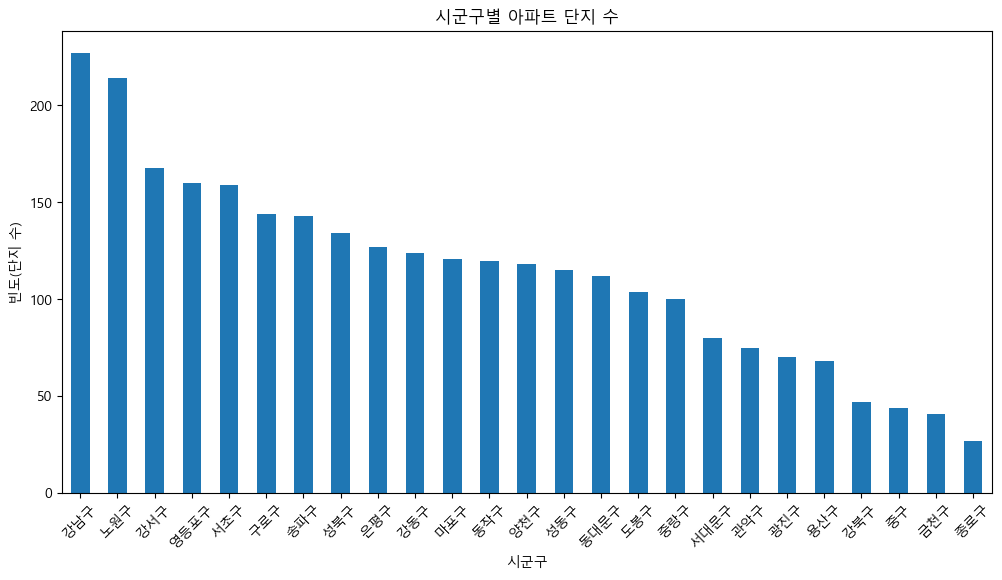

In [88]:
# ÏãúÍµ∞Íµ¨Î≥Ñ ÎπàÎèÑÎ•º ÎßâÎåÄÍ∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôî
freq.plot(kind='bar', figsize=(12, 6))

plt.title("ÏãúÍµ∞Íµ¨Î≥Ñ ÏïÑÌååÌä∏ Îã®ÏßÄ Ïàò")
plt.xlabel("ÏãúÍµ∞Íµ¨")
plt.ylabel("ÎπàÎèÑ(Îã®ÏßÄ Ïàò)")
plt.xticks(rotation=45)  # xÏ∂ï Í∏ÄÏûê Í∏∞Ïö∏Ïó¨ÏÑú Î≥¥Í∏∞ Ï¢ãÍ≤å
plt.show()

In [89]:
# Ï°∞Í±¥ ÏÑ§Ï†ï
conditions = [
    (apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] >= 0) & (apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] < 500),
    (apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] >= 500) & (apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] < 1000),
    (apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] >= 1000) & (apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] < 2000),
    (apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] >= 2000) & (apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] < 3000),
    (apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] >= 3000) & (apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] < 5000),
    (apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'] >= 5000)
]

# Í∞Å Ï°∞Í±¥Ïóê Ìï¥ÎãπÌïòÎäî Í∞í
choices = ['Ï¥àÏÜåÌòï', 'ÏÜåÌòï', 'Ï§ëÌòï', 'ÎåÄÌòï', 'ÌäπÎåÄÌòï', 'Ï¥àÎåÄÌòï']

# ÏÉàÎ°úÏö¥ Ïó¥ ÏÉùÏÑ±
apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàògroup'] = np.select(conditions, choices, default='Í∏∞ÌÉÄ')

# ÌôïÏù∏
print(apartment[['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàògroup']].head(10))

   k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàògroup
0      206          Ï¥àÏÜåÌòï
1      197          Ï¥àÏÜåÌòï
2      153          Ï¥àÏÜåÌòï
3      209          Ï¥àÏÜåÌòï
4      205          Ï¥àÏÜåÌòï
5      150          Ï¥àÏÜåÌòï
6      150          Ï¥àÏÜåÌòï
7      150          Ï¥àÏÜåÌòï
8      150          Ï¥àÏÜåÌòï
9      150          Ï¥àÏÜåÌòï


In [90]:
# ÎπàÎèÑ Íµ¨ÌïòÍ∏∞
freq_group = apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàògroup'].value_counts()

# Î∞±Î∂ÑÏú® Íµ¨ÌïòÍ∏∞
percent_group = apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàògroup'].value_counts(normalize=True) * 100

# Î≥¥Í∏∞ Ï¢ãÍ≤å DataFrameÏúºÎ°ú Ìï©ÏπòÍ∏∞
result_group = pd.DataFrame({
    'ÎπàÎèÑ': freq_group,
    'Î∞±Î∂ÑÏú®(%)': percent_group.round(2)
})

print(result_group)

                ÎπàÎèÑ  Î∞±Î∂ÑÏú®(%)
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàògroup              
Ï¥àÏÜåÌòï           1774   62.42
ÏÜåÌòï             653   22.98
Ï§ëÌòï             306   10.77
ÎåÄÌòï              70    2.46
ÌäπÎåÄÌòï             31    1.09
Ï¥àÎåÄÌòï              8    0.28


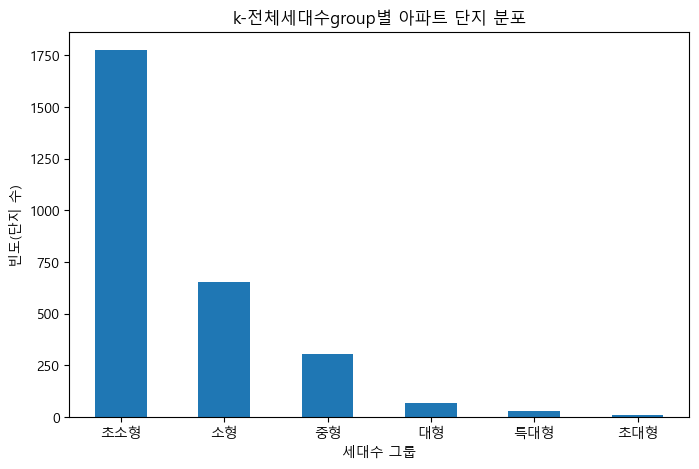

In [91]:
# ÎßâÎåÄÍ∑∏ÎûòÌîÑ (ÎπàÎèÑ Í∏∞Ï§Ä)
freq_group.plot(kind='bar', figsize=(8, 5))

plt.title("k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàògroupÎ≥Ñ ÏïÑÌååÌä∏ Îã®ÏßÄ Î∂ÑÌè¨")
plt.xlabel("ÏÑ∏ÎåÄÏàò Í∑∏Î£π")
plt.ylabel("ÎπàÎèÑ(Îã®ÏßÄ Ïàò)")
plt.xticks(rotation=0)  # xÏ∂ï Í∏ÄÏûê ÎòëÎ∞îÎ°ú ÏÑ∏Ïö∞Í∏∞
plt.show()

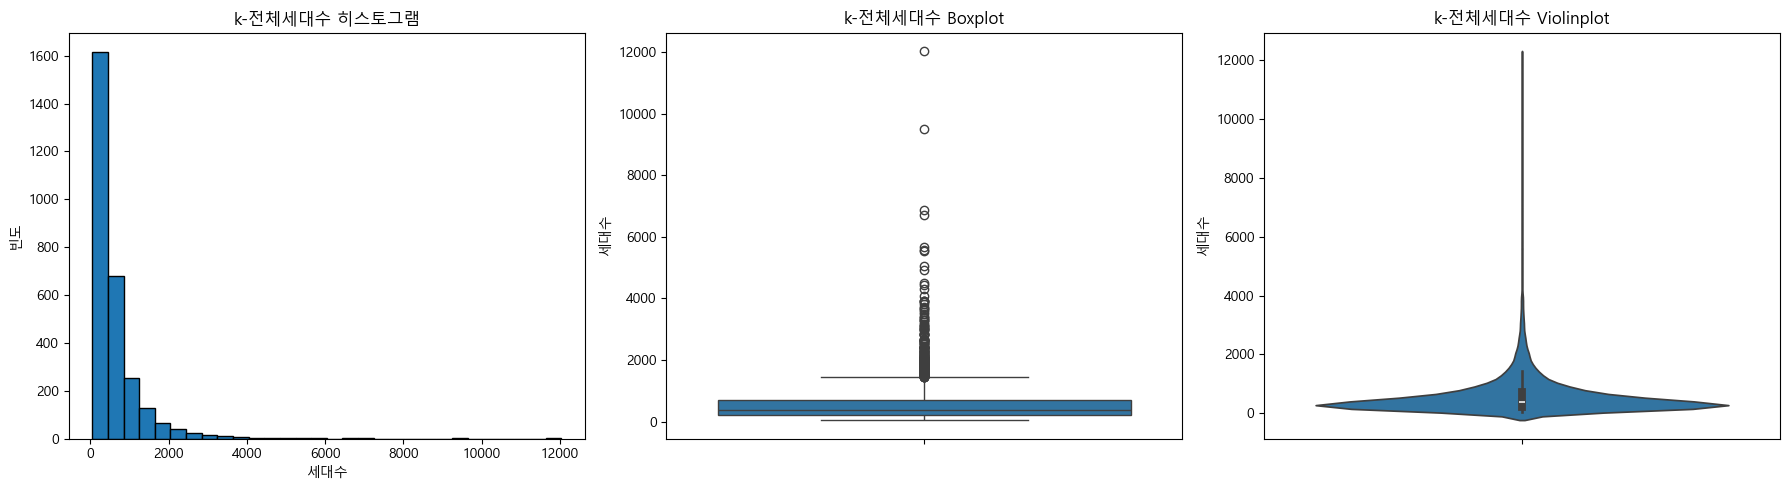

In [92]:
plt.figure(figsize=(18, 5))  # Ï†ÑÏ≤¥ Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞ (Í∞ÄÎ°úÎ°ú ÎÑìÍ≤å)

# 1. ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.subplot(1, 3, 1)  # 1Ìñâ 3Ïó¥ Ï§ë Ï≤´ Î≤àÏß∏
plt.hist(apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'], bins=30, edgecolor='black')
plt.title("k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò ÌûàÏä§ÌÜ†Í∑∏Îû®")
plt.xlabel("ÏÑ∏ÎåÄÏàò")
plt.ylabel("ÎπàÎèÑ")

# 2. ÏÉÅÏûêÍ∑∏Î¶º (Boxplot)
plt.subplot(1, 3, 2)  # 1Ìñâ 3Ïó¥ Ï§ë Îëê Î≤àÏß∏
sns.boxplot(y=apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'])
plt.title("k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Boxplot")
plt.ylabel("ÏÑ∏ÎåÄÏàò")

# 3. Î∞îÏù¥Ïò¨Î¶∞Í∑∏Î¶º (Violinplot)
plt.subplot(1, 3, 3)  # 1Ìñâ 3Ïó¥ Ï§ë ÏÑ∏ Î≤àÏß∏
sns.violinplot(y=apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'])
plt.title("k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Violinplot")
plt.ylabel("ÏÑ∏ÎåÄÏàò")

# Ï†ÑÏ≤¥ Î≥¥Ïó¨Ï£ºÍ∏∞
plt.tight_layout()
plt.show()

In [93]:
# Í∏∞Î≥∏ Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ (count, mean, std, min, 25%, 50%, 75%, max)
stats = apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'].describe()
print(stats)

count     2842.000000
mean       601.292752
std        684.980141
min         52.000000
25%        221.250000
50%        386.500000
75%        713.750000
max      12032.000000
Name: k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò, dtype: float64


=== ÎπàÎèÑÌëú ===
k-Îã®ÏßÄÎ∂ÑÎ•ò   ÎèÑÏãúÌòï ÏÉùÌôúÏ£ºÌÉù(ÏïÑÌååÌä∏)  ÎèÑÏãúÌòï ÏÉùÌôúÏ£ºÌÉù(Ï£ºÏÉÅÎ≥µÌï©)  ÏïÑÌååÌä∏  Ïó∞Î¶ΩÏ£ºÌÉù  Ï£ºÏÉÅÎ≥µÌï©
Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)                                                
Í∞ïÎÇ®Íµ¨                  0               0  184     2    23
Í∞ïÎèôÍµ¨                  1               0  106     1    16
Í∞ïÎ∂ÅÍµ¨                  0               0   42     0     5
Í∞ïÏÑúÍµ¨                  0               1  161     0     5
Í¥ÄÏïÖÍµ¨                  0               0   70     0     3

=== Ìñâ Î∞±Î∂ÑÏú®(%) ===
k-Îã®ÏßÄÎ∂ÑÎ•ò   ÎèÑÏãúÌòï ÏÉùÌôúÏ£ºÌÉù(ÏïÑÌååÌä∏)  ÎèÑÏãúÌòï ÏÉùÌôúÏ£ºÌÉù(Ï£ºÏÉÅÎ≥µÌï©)        ÏïÑÌååÌä∏      Ïó∞Î¶ΩÏ£ºÌÉù       Ï£ºÏÉÅÎ≥µÌï©
Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)                                                               
Í∞ïÎÇ®Íµ¨           0.000000        0.000000  88.038278  0.956938  11.004785
Í∞ïÎèôÍµ¨           0.806452        0.000000  85.483871  0.806452  12.903226
Í∞ïÎ∂ÅÍµ¨           0.000000        0.000000  89.361702  0.000000  10.6382

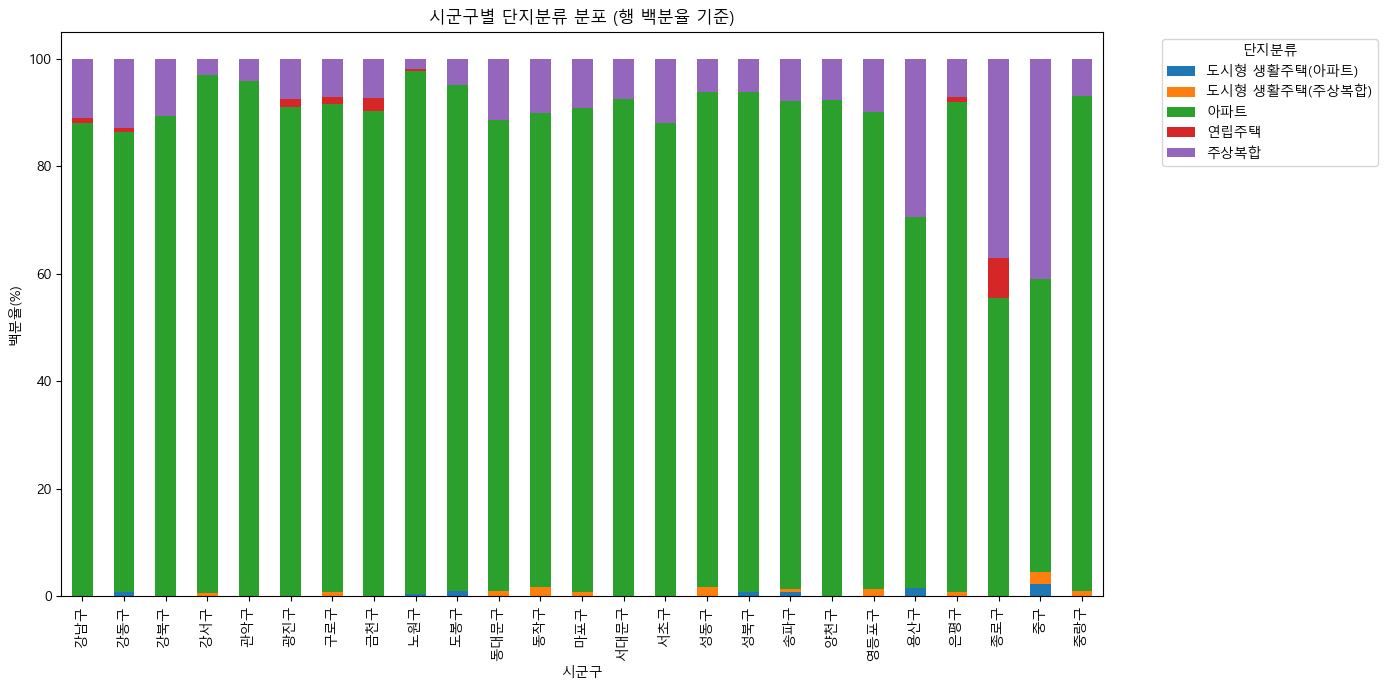

In [94]:
# 1. ÍµêÏ∞®Ìëú (ÎπàÎèÑÌëú)
# ==============================
ct_freq = pd.crosstab(apartment['Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)'], apartment['k-Îã®ÏßÄÎ∂ÑÎ•ò'])

# ==============================
# 2. ÍµêÏ∞®Ìëú (Ìñâ Î∞±Î∂ÑÏú®)
# ==============================
ct_row_pct = pd.crosstab(
    apartment['Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)'], 
    apartment['k-Îã®ÏßÄÎ∂ÑÎ•ò'], 
    normalize='index'   # Ìñâ Í∏∞Ï§Ä Ï†ïÍ∑úÌôî
) * 100

print("=== ÎπàÎèÑÌëú ===")
print(ct_freq.head())   # ÏùºÎ∂Ä ÎØ∏Î¶¨Î≥¥Í∏∞
print("\n=== Ìñâ Î∞±Î∂ÑÏú®(%) ===")
print(ct_row_pct.head())

# ==============================
# 3. ÎàÑÏ†Å ÎßâÎåÄÍ∑∏ÎûòÌîÑ (Ìñâ Î∞±Î∂ÑÏú® Í∏∞Ï§Ä)
# ==============================
plt.rc('font', family='Malgun Gothic')   # ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ
plt.rc('axes', unicode_minus=False)

ct_row_pct.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title("ÏãúÍµ∞Íµ¨Î≥Ñ Îã®ÏßÄÎ∂ÑÎ•ò Î∂ÑÌè¨ (Ìñâ Î∞±Î∂ÑÏú® Í∏∞Ï§Ä)")
plt.xlabel("ÏãúÍµ∞Íµ¨")
plt.ylabel("Î∞±Î∂ÑÏú®(%)")
plt.legend(title="Îã®ÏßÄÎ∂ÑÎ•ò", bbox_to_anchor=(1.05, 1), loc='upper left')  # Î≤îÎ°Ä Ïò§Î•∏Ï™Ω Î∞îÍπ•
plt.tight_layout()
plt.show()

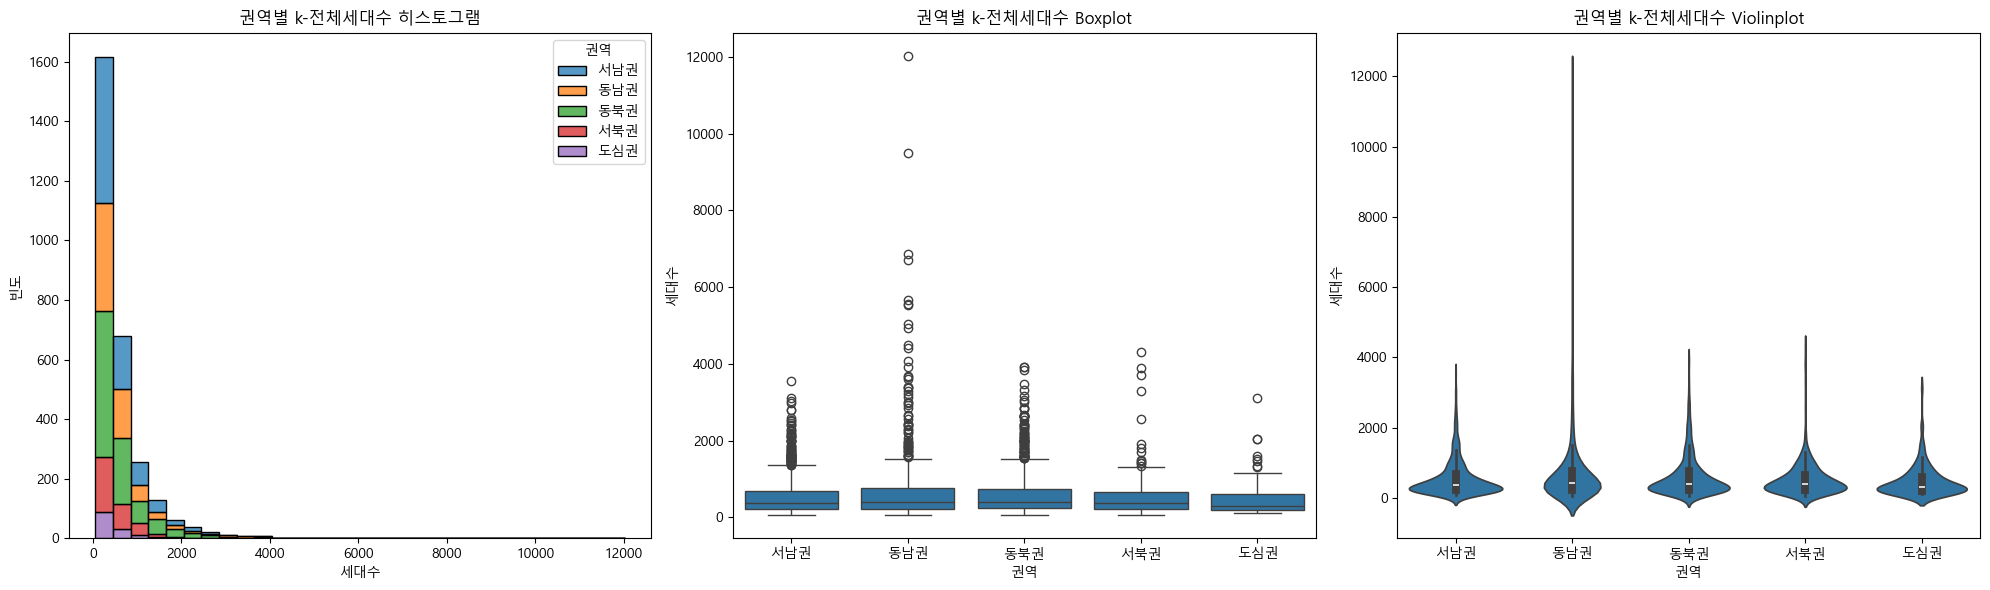

In [95]:
# Í∂åÏó≠Î≥Ñ Îß§Ìïë ÎîïÏÖîÎÑàÎ¶¨
region_map = {
    'Ï¢ÖÎ°úÍµ¨':'ÎèÑÏã¨Í∂å','Ï§ëÍµ¨':'ÎèÑÏã¨Í∂å','Ïö©ÏÇ∞Íµ¨':'ÎèÑÏã¨Í∂å',
    'ÏÑ±ÎèôÍµ¨':'ÎèôÎ∂ÅÍ∂å','Í¥ëÏßÑÍµ¨':'ÎèôÎ∂ÅÍ∂å','ÎèôÎåÄÎ¨∏Íµ¨':'ÎèôÎ∂ÅÍ∂å','Ï§ëÎûëÍµ¨':'ÎèôÎ∂ÅÍ∂å',
    'ÏÑ±Î∂ÅÍµ¨':'ÎèôÎ∂ÅÍ∂å','Í∞ïÎ∂ÅÍµ¨':'ÎèôÎ∂ÅÍ∂å','ÎèÑÎ¥âÍµ¨':'ÎèôÎ∂ÅÍ∂å','ÎÖ∏ÏõêÍµ¨':'ÎèôÎ∂ÅÍ∂å',
    'ÏùÄÌèâÍµ¨':'ÏÑúÎ∂ÅÍ∂å','ÏÑúÎåÄÎ¨∏Íµ¨':'ÏÑúÎ∂ÅÍ∂å','ÎßàÌè¨Íµ¨':'ÏÑúÎ∂ÅÍ∂å',
    'ÏñëÏ≤úÍµ¨':'ÏÑúÎÇ®Í∂å','Í∞ïÏÑúÍµ¨':'ÏÑúÎÇ®Í∂å','Íµ¨Î°úÍµ¨':'ÏÑúÎÇ®Í∂å','Í∏àÏ≤úÍµ¨':'ÏÑúÎÇ®Í∂å',
    'ÏòÅÎì±Ìè¨Íµ¨':'ÏÑúÎÇ®Í∂å','ÎèôÏûëÍµ¨':'ÏÑúÎÇ®Í∂å','Í¥ÄÏïÖÍµ¨':'ÏÑúÎÇ®Í∂å',
    'ÏÑúÏ¥àÍµ¨':'ÎèôÎÇ®Í∂å','Í∞ïÎÇ®Íµ¨':'ÎèôÎÇ®Í∂å','ÏÜ°ÌååÍµ¨':'ÎèôÎÇ®Í∂å','Í∞ïÎèôÍµ¨':'ÎèôÎÇ®Í∂å'
}

# Í∂åÏó≠ Ïª¨Îüº Ï∂îÍ∞Ä
apartment['Í∂åÏó≠'] = apartment['Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)'].map(region_map)

# ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄ
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

plt.figure(figsize=(20, 6))

# ===== 1. ÌûàÏä§ÌÜ†Í∑∏Îû® =====
plt.subplot(1, 3, 1)
sns.histplot(data=apartment, x="k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò", hue="Í∂åÏó≠", multiple="stack", bins=30)
plt.title("Í∂åÏó≠Î≥Ñ k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò ÌûàÏä§ÌÜ†Í∑∏Îû®")
plt.xlabel("ÏÑ∏ÎåÄÏàò")
plt.ylabel("ÎπàÎèÑ")

# ===== 2. ÏÉÅÏûêÍ∑∏Î¶º (Boxplot) =====
plt.subplot(1, 3, 2)
sns.boxplot(x="Í∂åÏó≠", y="k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò", data=apartment)
plt.title("Í∂åÏó≠Î≥Ñ k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Boxplot")
plt.xlabel("Í∂åÏó≠")
plt.ylabel("ÏÑ∏ÎåÄÏàò")

# ===== 3. Î∞îÏù¥Ïò¨Î¶∞ Í∑∏Î¶º (Violinplot) =====
plt.subplot(1, 3, 3)
sns.violinplot(x="Í∂åÏó≠", y="k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò", data=apartment)
plt.title("Í∂åÏó≠Î≥Ñ k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò Violinplot")
plt.xlabel("Í∂åÏó≠")
plt.ylabel("ÏÑ∏ÎåÄÏàò")

plt.tight_layout()
plt.show()

In [96]:
# Í∏∞Î≥∏ Í∏∞Ïà†ÌÜµÍ≥ÑÎüâ
stats = apartment.groupby("Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)")["k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò"].describe()
print(stats)

         count        mean          std    min     25%    50%      75%  \
Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)                                                                  
Í∞ïÎÇ®Íµ¨      227.0  621.969163   807.918112   54.0  193.50  378.0   735.00   
Í∞ïÎèôÍµ¨      124.0  792.056452  1288.682104   74.0  226.00  460.0   807.50   
Í∞ïÎ∂ÅÍµ¨       47.0  713.063830   674.340335  167.0  260.50  430.0  1075.50   
Í∞ïÏÑúÍµ¨      168.0  577.375000   529.134880  110.0  212.75  357.5   680.00   
Í¥ÄÏïÖÍµ¨       75.0  650.493333   688.682455  109.0  202.00  363.0   791.00   
Í¥ëÏßÑÍµ¨       70.0  407.200000   317.610855  119.0  205.00  299.5   447.00   
Íµ¨Î°úÍµ¨      144.0  520.500000   413.483750  100.0  251.25  376.0   656.25   
Í∏àÏ≤úÍµ¨       41.0  656.024390   606.772589  109.0  210.00  341.0   986.00   
ÎÖ∏ÏõêÍµ¨      214.0  759.990654   738.865600  115.0  268.50  485.0   848.75   
ÎèÑÎ¥âÍµ¨      104.0  587.778846   616.816521  105.0  202.00  341.5   667.50   
ÎèôÎåÄÎ¨∏Íµ¨     112.0  591.857143   543.3

In [97]:
# ÏãúÍµ∞Íµ¨Î≥Ñ Î≥ÄÎèôÍ≥ÑÏàò (CV = std / mean)
cv = apartment.groupby("Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)")["k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò"].agg(['mean','std'])
cv['CV'] = cv['std'] / cv['mean']

print(cv[['CV']].round(3))  

            CV
Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)       
Í∞ïÎÇ®Íµ¨      1.299
Í∞ïÎèôÍµ¨      1.627
Í∞ïÎ∂ÅÍµ¨      0.946
Í∞ïÏÑúÍµ¨      0.916
Í¥ÄÏïÖÍµ¨      1.059
Í¥ëÏßÑÍµ¨      0.780
Íµ¨Î°úÍµ¨      0.794
Í∏àÏ≤úÍµ¨      0.925
ÎÖ∏ÏõêÍµ¨      0.972
ÎèÑÎ¥âÍµ¨      1.049
ÎèôÎåÄÎ¨∏Íµ¨     0.918
ÎèôÏûëÍµ¨      0.758
ÎßàÌè¨Íµ¨      0.976
ÏÑúÎåÄÎ¨∏Íµ¨     1.004
ÏÑúÏ¥àÍµ¨      1.083
ÏÑ±ÎèôÍµ¨      0.828
ÏÑ±Î∂ÅÍµ¨      0.967
ÏÜ°ÌååÍµ¨      1.537
ÏñëÏ≤úÍµ¨      1.027
ÏòÅÎì±Ìè¨Íµ¨     0.805
Ïö©ÏÇ∞Íµ¨      0.780
ÏùÄÌèâÍµ¨      0.798
Ï¢ÖÎ°úÍµ¨      0.717
Ï§ëÍµ¨       1.107
Ï§ëÎûëÍµ¨      0.811


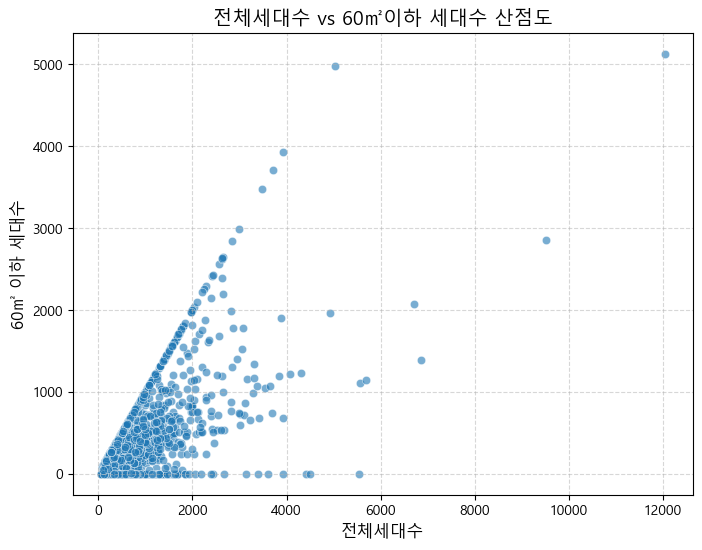

In [98]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=apartment,
    x="k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò",
    y="k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)",
    alpha=0.6   # Ï†ê Ìà¨Î™ÖÎèÑ (Í≤πÏπ† Îïå Î≥¥Í∏∞ Ï¢ãÍ≤å)
)

plt.title("Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò vs 60„é°Ïù¥Ìïò ÏÑ∏ÎåÄÏàò ÏÇ∞Ï†êÎèÑ", fontsize=14)
plt.xlabel("Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò", fontsize=12)
plt.ylabel("60„é° Ïù¥Ìïò ÏÑ∏ÎåÄÏàò", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [99]:
# ÏÉÅÍ¥ÄÍ≥ÑÏàò Íµ¨ÌïòÍ∏∞
corr = apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'].corr(apartment['k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)'])
print("ÏÉÅÍ¥ÄÍ≥ÑÏàò:", round(corr, 3))

ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.702


In [100]:
print(apartment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Î≤àÌò∏                      2842 non-null   int64         
 1   k-ÏïÑÌååÌä∏ÏΩîÎìú                 2842 non-null   object        
 2   k-ÏïÑÌååÌä∏Î™Ö                  2842 non-null   object        
 3   k-Îã®ÏßÄÎ∂ÑÎ•ò                  2792 non-null   object        
 4   kaptÎèÑÎ°úÎ™ÖÏ£ºÏÜå               2779 non-null   object        
 5   Ï£ºÏÜå(ÏãúÎèÑ)k-aptÏ£ºÏÜåsplit      2842 non-null   object        
 6   Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)                 2842 non-null   object        
 7   Ï£ºÏÜå(ÏùçÎ©¥Îèô)                 2842 non-null   object        
 8   ÎÇòÎ®∏ÏßÄÏ£ºÏÜå                   2133 non-null   object        
 9   Ï£ºÏÜå(ÎèÑÎ°úÎ™Ö)                 2797 non-null   object        
 10  Ï£ºÏÜå(ÎèÑÎ°úÏÉÅÏÑ∏Ï£ºÏÜå)              2790 non-null   object        
 11  

In [101]:
# one-hot encoding ÏàòÌñâ
X_encoded = pd.get_dummies(
    X, 
    columns=['k-Îã®ÏßÄÎ∂ÑÎ•ò', 'Ï£ºÏÜå(ÏãúÍµ∞Íµ¨)'], 
    drop_first=True  # Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î∞©ÏßÄÎ•º ÏúÑÌï¥ Ï≤´ Î≤àÏß∏ Ïπ¥ÌÖåÍ≥†Î¶¨Îäî Ï†úÍ±∞
)

print("Ïù∏ÏΩîÎî© Ï†Ñ shape:", X.shape)
print("Ïù∏ÏΩîÎî© ÌõÑ shape:", X_encoded.shape)
print(X_encoded.head())

Ïù∏ÏΩîÎî© Ï†Ñ shape: (2842, 48)
Ïù∏ÏΩîÎî© ÌõÑ shape: (2842, 74)
   Î≤àÌò∏    k-ÏïÑÌååÌä∏ÏΩîÎìú      k-ÏïÑÌååÌä∏Î™Ö               kaptÎèÑÎ°úÎ™ÖÏ£ºÏÜå Ï£ºÏÜå(ÏãúÎèÑ)k-aptÏ£ºÏÜåsplit  \
0   1  A15679103       Ïö∞Î¶¨Ïú†Ïï§ÎØ∏        ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÏûëÍµ¨ ÏÑúÎã¨Î°ú 83                 ÏÑúÏö∏   
1   2  A13876112  ÏÜ°ÌååÌååÏù∏ÌÉÄÏö¥13Îã®ÏßÄ     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ ÏÜ°ÌååÎåÄÎ°ú8Í∏∏ 10                 ÏÑúÏö∏   
2   3  A13873701  Ïò§Í∏àÌòÑÎåÄÎ∞±Ï°∞(ÏûÑÎåÄ)    ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÜ°ÌååÍµ¨ ÏñëÏû¨ÎåÄÎ°ú72Í∏∏ 20                 ÏÑúÏö∏   
3   4  A15275101        Í∞úÎ¥âÍ±¥ÏòÅ  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Í≥†Ï≤ôÎ°ú21ÎÇòÍ∏∏ 85-6                 ÏÑúÏö∏   
4   6  A13991016    ÏõîÍ≥ÑÎèôÏõêÎ≤†ÎÑ§Ïä§Ìä∏     ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎÖ∏ÏõêÍµ¨ ÏõîÍ≥ÑÎ°ú53Í∏∏ 21                 ÏÑúÏö∏   

  Ï£ºÏÜå(ÏùçÎ©¥Îèô)                ÎÇòÎ®∏ÏßÄÏ£ºÏÜå  Ï£ºÏÜå(ÎèÑÎ°úÎ™Ö)           Ï£ºÏÜå(ÎèÑÎ°úÏÉÅÏÑ∏Ï£ºÏÜå)     k-Ï†ÑÌôîÎ≤àÌò∏  ...  \
0     ÌùëÏÑùÎèô             Ïö∞Î¶¨Ïú†Ïï§ÎØ∏ÏïÑÌååÌä∏      ÏÑúÎã¨Î°ú                   83   281275

In [82]:
# y: Î™©ÌëúÎ≥ÄÏàò
y = apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò']

# X: ÏûÖÎ†•Î≥ÄÏàò (Ï†ÑÏ≤¥ÏóêÏÑú y Ïª¨Îüº Ï†úÏô∏)
X = apartment.drop(columns=['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'])

# ÌõàÎ†®/ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (70% : 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,   # ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÎπÑÏú®
    random_state=42  # Ïû¨ÌòÑÏÑ±(Ïã§ÌñâÌï† ÎïåÎßàÎã§ Í∞ôÏùÄ Í≤∞Í≥º ÎÇòÏò§Í≤å)
)

print("ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", X_train.shape, y_train.shape)
print("ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞:", X_test.shape, y_test.shape)

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1989, 48) (1989,)
ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (853, 48) (853,)


In [102]:
# 1. ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
# ---------------------------
# y = apartment['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò']
# X = apartment.drop(columns=['k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò'])
# üëâ Ïó¨Í∏∞ÏÑú XÎäî Ïù¥ÎØ∏ one-hot encoding ÏôÑÎ£åÎêú Î≤ÑÏ†ÑÏù¥ÎùºÍ≥† Í∞ÄÏ†ï (X_encoded)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42
)

# ---------------------------
# 2. Î™®Îç∏ Ï†ïÏùò
# ---------------------------
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

# ---------------------------
# 3. ÌõàÎ†® + ÌèâÍ∞Ä
# ---------------------------
rmse_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)            # ÌõàÎ†®
    y_pred = model.predict(X_test)         # ÌèâÍ∞Ä Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_results[name] = rmse
    print(f"{name} RMSE: {rmse:.2f}")

# ---------------------------
# 4. Í≤∞Í≥º Ï†ïÎ¶¨
# ---------------------------
rmse_df = pd.DataFrame(list(rmse_results.items()), columns=["Model", "RMSE"])
print("\n=== RMSE ÎπÑÍµê ===")
print(rmse_df.sort_values(by="RMSE"))

TypeError: Cannot cast DatetimeArray to dtype float64